https://www.youtube.com/watch?v=AKMZMjxF4YQ&t=747s

### Scraping Data from IMDB Database

#### Requirements : 
We use Selenium for Browser automation and BeautifulSoup for Data Extraction

We need to go to : https://www.imdb.com/
- Select "ALL"
- Select "Advanced Search" > "Advanced Title Search"
- Below is a list of things we are going to select

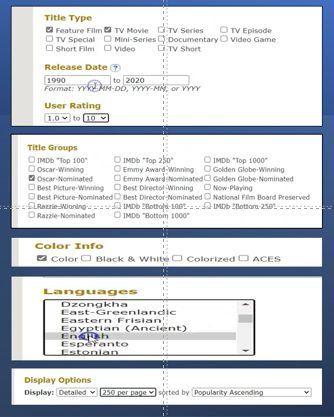

All the below filters would be applied using Selenium Library
- Title type : "Feature Film"
- Release Date : 1990 to 2020
- User Rating : between 1 and 10
- Title groups : "Oscar Nominated"
- Color Info : "color"
- Languages : English
- Display option : 250 Results per page

Then , when we reach the result page , we will use BeautifulSoup to loop through every result and append 
to dataframe

In [41]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
from selenium.webdriver.support.select import Select
#from selenium.webdriver.support.ui import select
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from random import randint
import urllib.parse
import warnings
warnings.filterwarnings('ignore')
headers = {"Accept-Language" : "en-US,en;q=0.5"}
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from selenium.common.exceptions import NoSuchElementException, ElementNotVisibleException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

### Browser Automation with Selenium

In [3]:
website = 'https://imdb.com'
# chrome_options = Options()
# chrome_options.add_argument("--lang=en");
# chrome_options.add_experimental_option('excludeSwitches', ['enable-logging'])
# prefs = {
#         "translate_whitelists": {'id':'en'},
#        "translate":{"enabled":"True"}}
# chrome_options.add_experimental_option("prefs", prefs)
#creating driver variable and providing the path where the chrome driver is stored
# driver = webdriver.Chrome('C:\webdrivers\chromedriver.exe',options=chrome_options)
driver = webdriver.Chrome('C:\webdrivers\chromedriver.exe')
time.sleep(2)
driver.get(website)
time.sleep(2)

#### Accessing Individual Items first

Now we need to locate this dropdown menu

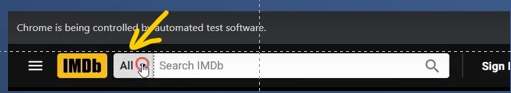

In [4]:
#dropdown
dropdown = driver.find_element(By.CLASS_NAME , 'ipc-icon--arrow-drop-down')

In [6]:
#we will try to click on this Dropdown
dropdown.click()

Now we need to select "Advanced Search"
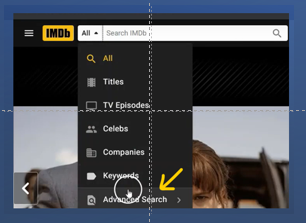

In [9]:
#dropdown
dropdown = driver.find_element(By.CLASS_NAME , 'ipc-icon--arrow-drop-down')
time.sleep(5)
#we will try to click on this Dropdown
dropdown.click()
time.sleep(5)
#Advanced Search is a Link that will be opened in the background
element = driver.find_element(By.LINK_TEXT , 'Advanced Search')
element.click()

In [10]:
#Click on advanced Title Search

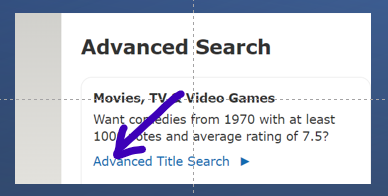

In [11]:
driver.find_element(By.LINK_TEXT , 'Advanced Title Search')

<selenium.webdriver.remote.webelement.WebElement (session="b1791659edcb48cb16779029a046e6c2", element="bf354b69-e59d-41e3-804d-9ffd696808a2")>

In [13]:
#Click on advanced Title Search
adv_title = driver.find_element(By.LINK_TEXT , 'Advanced Title Search')

In [14]:
adv_title.click()

In [15]:
#Select title > "Feature Film"

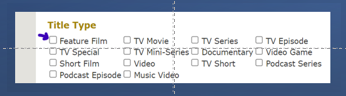

In [17]:
#Right click on the check box and inspect it
#If you see 'id' you are lucky because you can easily find it since every 'id' is Unique
feature_film = driver.find_element(By.ID , 'title_type-1')

In [18]:
feature_film.click()

In [19]:
#Click on TV Movie

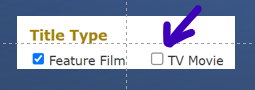

In [20]:
tv_movie = driver.find_element(By.ID , 'title_type-2')

In [21]:
tv_movie.click()

In [22]:
#Enter Release Date : starting : 1990 to 2020

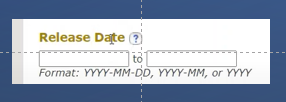

In [23]:
#min date : 1990 , max date : 2020

In [24]:
driver.find_element(By.NAME, 'release_date-min')

<selenium.webdriver.remote.webelement.WebElement (session="b1791659edcb48cb16779029a046e6c2", element="894f358c-a87c-4e39-9bdf-50b2466b78ec")>

In [25]:
min_date = driver.find_element(By.NAME, 'release_date-min')

In [26]:
min_date.click()

In [27]:
min_date.send_keys('1990')

In [30]:
max_date = driver.find_element(By.NAME, 'release_date-max')

In [31]:
max_date.click()

In [32]:
max_date.send_keys('2020')

In [34]:
#User Rating

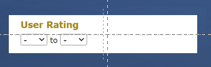

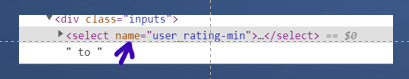

In [40]:
#rating_min
#we need to find the element by "name" selector
rating_min = driver.find_element(By.NAME , 'user_rating-min')
rating_min.click()
#we need to make use of the Select class
dropdown_2 = Select(rating_min)
dropdown_2.select_by_visible_text('1.0')

time.sleep(3)

#rating_max
rating_max = driver.find_element(By.NAME , 'user_rating-max')
rating_max.click()
#we need to make use of the Select class
dropdown_3 = Select(rating_max)
dropdown_3.select_by_visible_text('10')

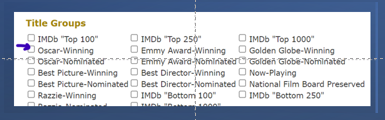

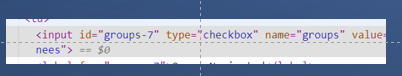

In [42]:
#Oscar nominated
oscar_nominated = driver.find_element(By.ID , 'groups-7')

In [43]:
oscar_nominated.click()

In [45]:
#Color info

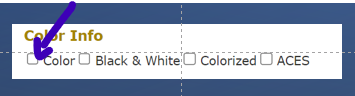

In [46]:
color = driver.find_element(By.ID , 'colors-1')

In [47]:
color.click()

In [49]:
#language
#select "English" language

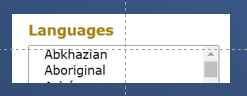

In [50]:
#we need to scroll down and select the language
#Right click and inspect

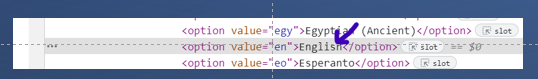

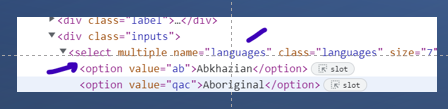

We again have the "select" tag here 
- we can find the element by name 
- name = 'languages'

In [53]:
#language
language = driver.find_element(By.NAME , 'languages' )
drop_down4 = Select(language)
drop_down4.select_by_visible_text('English')

In [54]:
#250 Results per page

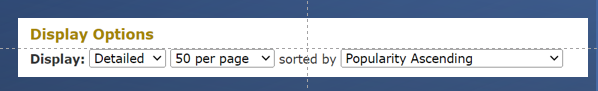

We need to Select by index
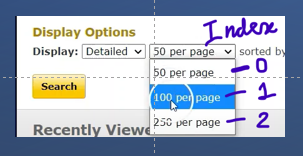

In [55]:
results_count = driver.find_element(By.ID , 'search-count')
drop_down5 = Select(results_count)

In [56]:
drop_down5.select_by_index(2)

In [57]:
#Search button

- When we type the XPath in the "Find" box in "Inspect"
- If it shows 1 of 2
- This means the XPath is not unique and there is one more element with the same XPath
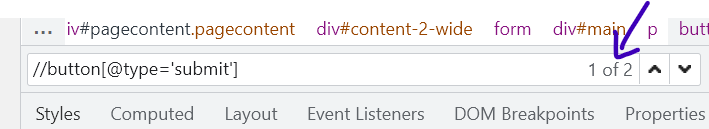

Then we can try some other Xpath
- //button[@class='primary']

### OR

If it shows 1 of 2 . We can use Indexing to reference the particular element
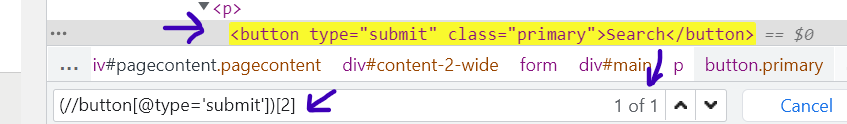

In [59]:
submit = driver.find_element(By.XPATH , "(//button[@type='submit'])[2]")

In [60]:
submit.click()

Now we land on a new page :
   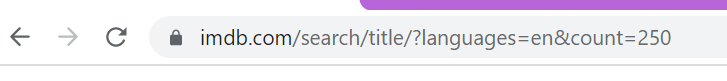 

- We store this url in a different variable and hand it over to BeutifulSoup

In [66]:
#Get the Current URL
driver.current_url 

'https://www.imdb.com/search/title/?title_type=feature,tv_movie&release_date=1990-01-01,2020-12-31&user_rating=1.0,10.0&groups=oscar_nominee&colors=color&languages=en&count=250'

- On this page we see 250 Movie results
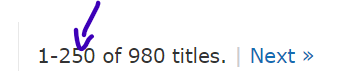

#### Using BeautifulSoup to extract the Data

In [68]:
driver.current_url

'https://www.imdb.com/search/title/?title_type=feature,tv_movie&release_date=1990-01-01,2020-12-31&user_rating=1.0,10.0&groups=oscar_nominee&colors=color&languages=en&count=250'

In [72]:
current_url = driver.current_url

Till here we use the Selenium Web Driver

In [69]:
#Now we import libraries for BeautifulSoup
from bs4 import BeautifulSoup
import requests

In [73]:
#WE are sending request to the current_url
response = requests.get(current_url)

In [74]:
#status Code
response.status_code

200

### Put everything together

In [62]:
website = 'https://imdb.com'
driver = webdriver.Chrome('C:\webdrivers\chromedriver.exe')
time.sleep(2)
driver.get(website)
time.sleep(2)
driver.maximize_window()

#dropdown
dropdown = driver.find_element(By.CLASS_NAME , 'ipc-icon--arrow-drop-down')
time.sleep(5)
#we will try to click on this Dropdown
dropdown.click()
time.sleep(5)

#Advanced Search is a Link that will be opened in the background
element = driver.find_element(By.LINK_TEXT , 'Advanced Search')
element.click()

#Click on advanced Title Search
adv_title = driver.find_element(By.LINK_TEXT , 'Advanced Title Search')
time.sleep(2)
adv_title.click()

#Right click on the check box and inspect it
#If you see 'id' you are lucky because you can easily find it since every 'id' is Unique
feature_film = driver.find_element(By.ID , 'title_type-1')
feature_film.click()
time.sleep(2)

#Click on TV Movie
tv_movie = driver.find_element(By.ID , 'title_type-2')
tv_movie.click()

#min date : 1990 , max date : 2020
min_date = driver.find_element(By.NAME, 'release_date-min')
min_date.click()
min_date.send_keys('1990')
time.sleep(2)

#max_date
max_date = driver.find_element(By.NAME, 'release_date-max')
max_date.click()
max_date.send_keys('2020')
time.sleep(2)

#rating_min
#we need to find the element by "name" selector
rating_min = driver.find_element(By.NAME , 'user_rating-min')
rating_min.click()
#we need to make use of the Select class
dropdown_2 = Select(rating_min)
dropdown_2.select_by_visible_text('1.0')
time.sleep(3)

#rating_max
rating_max = driver.find_element(By.NAME , 'user_rating-max')
rating_max.click()
#we need to make use of the Select class
dropdown_3 = Select(rating_max)
dropdown_3.select_by_visible_text('10')
time.sleep(2)

#Oscar nominated
oscar_nominated = driver.find_element(By.ID , 'groups-7')
oscar_nominated.click()
time.sleep(3)

#Color info
color = driver.find_element(By.ID , 'colors-1')
color.click()
time.sleep(3)

#language
language = driver.find_element(By.NAME , 'languages' )
drop_down4 = Select(language)
drop_down4.select_by_visible_text('English')

#250 Results per page
results_count = driver.find_element(By.ID , 'search-count')
drop_down5 = Select(results_count)
drop_down5.select_by_index(2)

#Submit or Click on the Search button after selecting all the options
submit = driver.find_element(By.XPATH , "(//button[@type='submit'])[2]")
submit.click()

#current url
current_url = driver.current_url

In [75]:
#Now we import libraries for BeautifulSoup
from bs4 import BeautifulSoup
import requests

In [76]:
#WE are sending request to the current_url
response = requests.get(current_url)

In [77]:
#status Code
response.status_code

200

In [78]:
#create soup object
soup = BeautifulSoup(response.content , 'html.parser')

In [79]:
soup


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Feature Film/TV Movie,
Released between 1990-01-01 and 2020-12-31,
User Rating between 1 and 10,
Oscar-Nominated,
Color,
English
(Sorted by Popularity Ascending) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/search/title/

In [80]:
#we need to access all the movies listed
#click on insepect
#we see all the movies listed here

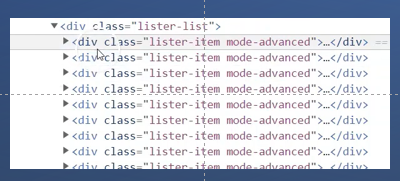

In [82]:
#result items starting point
list_items = soup.find_all('div' , {'class' : 'lister-item'})

In [83]:
len(list_items)

250

#### Data we want to extract

- movie_title
- year
- duration
- genre
- rating

In [84]:
#movie_title
#we will extract the data for one list item 
#We will loop through each and every element 

In [85]:
#We start with the first item
#That will be the List item with index 0

In [86]:
list_items[0]

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt1825683"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt1825683/"> <img alt="Black Panther" class="loadlate" data-tconst="tt1825683" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMTg1MTY2MjYzNV5BMl5BanBnXkFtZTgwMTc4NTMwNDI@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt1825683/">Black Panther</a>
<span class="lister-item-year text-muted unbold">(2018)</span>
</h3>
<p class="text-muted">
<span class="certificate">PG-13</span>
<span class="ghost">|</span>
<span class="runtime">134 min</span>
<span class="ghost">|</span>
<span class="genre">
Action, Adventure, Sci-Fi            </span>
</p>
<div

In [87]:
#movie_title

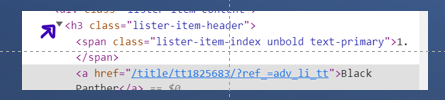

In [88]:
list_items[0].find('h3')

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt1825683/">Black Panther</a>
<span class="lister-item-year text-muted unbold">(2018)</span>
</h3>

In [89]:
list_items[0].find('h3').find('a')

<a href="/title/tt1825683/">Black Panther</a>

In [90]:
list_items[0].find('h3').find('a').text

'Black Panther'

In [91]:
#year

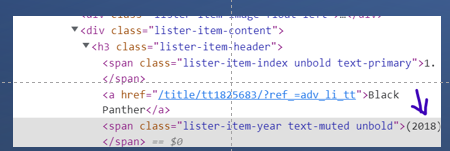

In [95]:
list_items[0].find('h3').find('span', {'class' : 'lister-item-year'})

<span class="lister-item-year text-muted unbold">(2018)</span>

In [96]:
list_items[0].find('h3').find('span', {'class' : 'lister-item-year'}).text

'(2018)'

In [98]:
list_items[0].find('h3').find('span', {'class' : 'lister-item-year'}).text.strip('()')

'2018'

In [99]:
#Duration

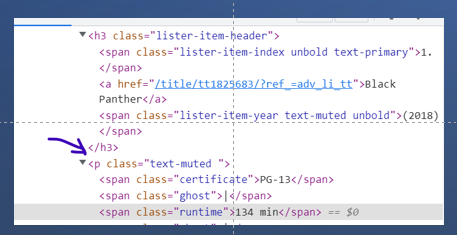

In [100]:
list_items[0].find('p').find('span' , {'class' : 'runtime'})

<span class="runtime">134 min</span>

In [101]:
list_items[0].find('p').find('span' , {'class' : 'runtime'}).text

'134 min'

In [102]:
#Genre

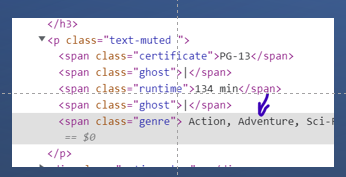

In [104]:
list_items[0].find('p').find('span' ,{'class' : 'genre'})

<span class="genre">
Action, Adventure, Sci-Fi            </span>

In [105]:
list_items[0].find('p').find('span' ,{'class' : 'genre'}).text

'\nAction, Adventure, Sci-Fi            '

In [106]:
list_items[0].find('p').find('span' ,{'class' : 'genre'}).text.strip()

'Action, Adventure, Sci-Fi'

In [107]:
#rating

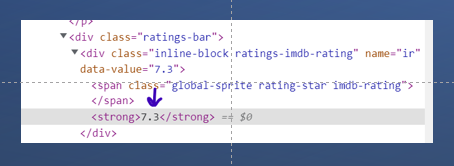

In [113]:
#list_items[0].find('div' , {'class' : 'ratings-bar'}).find('div' , {'class' : 'inline-block'}).find('strong').text

In [112]:
list_items[0].find('div' , {'class' : 'inline-block'}).find('strong').text

'7.3'

#### Now we got all headings for just one Movie

In [115]:
#We will make use of the List comprehension for looping through all 250 elements
#And append the appropriate data to the List

- movie_title_list
- year_list
- duration_list
- genre_list
- rating_list

In [116]:
#result is our iteration variable 
#we loop through the list items 
movie_title = [result.find('h3').find('a').text for result in list_items]
year = [result.find('h3').find('span', {'class' : 'lister-item-year'}).text.strip('()') for result in list_items]
duration = [result.find('p').find('span' , {'class' : 'runtime'}).text for result in list_items]
genre = [result.find('p').find('span' ,{'class' : 'genre'}).text.strip() for result in list_items]
rating = [result.find('div' , {'class' : 'inline-block'}).find('strong').text for result in list_items]

In [119]:
#we make use of Pandas DataFrame
imdb_df = pd.DataFrame({'Movie_Title' : movie_title , 'Year' : year , 'Duration' : duration ,
                        'Genre' : genre , 'rating' : rating})

In [120]:
imdb_df

,Movie_Title,Year,Duration,Genre,rating
0,Black Panther,2018,134 min,"Action, Adventure, Sci-Fi",7.3
1,Avatar,2009,162 min,"Action, Adventure, Fantasy",7.8
2,The Shawshank Redemption,1994,142 min,Drama,9.3
3,Harry Potter and the Sorcerer's Stone,2001,152 min,"Adventure, Family, Fantasy",7.6
4,Knives Out,2019,130 min,"Comedy, Crime, Drama",7.9
...,...,...,...,...,...
245,Bombshell,I) (2019,109 min,"Biography, Drama",6.8
246,Emma.,2020,124 min,"Comedy, Drama, Romance",6.7
247,Lo imposible,2012,114 min,"Adventure, Drama, History",7.5
248,Cinderella,I) (2015,105 min,"Adventure, Drama, Family",6.9


In [121]:
imdb_df.shape

(250, 5)

Aisha Khalid